<a href="https://colab.research.google.com/github/sadiaafrinsadia99/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project : Fake News Detection**

---


**Dataset**

This is the link to the dataset:
https://raw.githubusercontent.com/raima2001/HerWILL-NSDC-DS-Contest/main/news_dataset_subset%20(1).csv

In [ ]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
#Read the dataset using Pandas
url = 'https://raw.githubusercontent.com/raima2001/HerWILL-NSDC-DS-Contest/main/news_dataset_subset%20(1).csv'
data = pd.read_csv(url)

In [ ]:
#See what the data looks like
data.head()

,text,word_label
0,No comment is expected from Barack Obama Membe...,real
1,Did they post their votes for Hillary already?,real
2,"Now, most of the demonstrators gathered last ...",real
3,A dozen politically active pastors came here f...,fake
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",real


In [ ]:
#Get the summary of the data
data.describe()

,text,word_label
count,6994,7000
unique,6832,2
top,,real
freq,77,3696


In [ ]:
# get the count of each unique value
word_label_count = data['word_label'].value_counts()

print(word_label_count)

real    3696
fake    3304
Name: word_label, dtype: int64


In [ ]:
#Import library for visualization
%matplotlib inline
from matplotlib import pyplot as plt

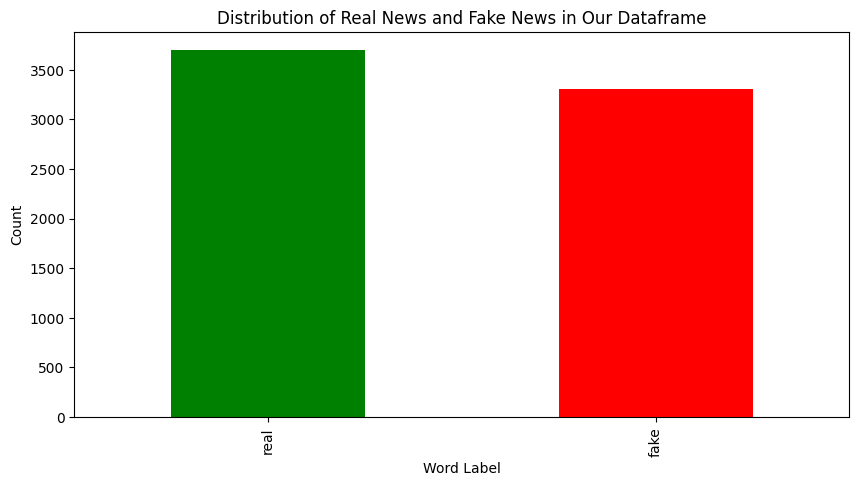

In [ ]:
# Plot the bar chart
plt.figure(figsize=(10,5))
word_label_count.plot(kind='bar', color=['green', 'red'])

plt.xlabel('Word Label')
plt.ylabel('Count')
plt.title('Distribution of Real News and Fake News in Our Dataframe')

plt.show()


In [ ]:
#Get all the necessary details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        6994 non-null   object
 1   word_label  7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


In [ ]:
#See how many total null values
data.isnull().sum()

text          6
word_label    0
dtype: int64

In [ ]:
#Fill in the null values
data['text'].fillna('No Info', inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        7000 non-null   object
 1   word_label  7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


Task 10: Lets turn the text column to string by using astype(str) function. (Marks: 2)

In [ ]:
#Turn the text column to string
data['text'].astype(str)

0       No comment is expected from Barack Obama Membe...
1          Did they post their votes for Hillary already?
2        Now, most of the demonstrators gathered last ...
3       A dozen politically active pastors came here f...
4       The RS-28 Sarmat missile, dubbed Satan 2, will...
                              ...                        
6995    RAMALLAH, West Bank (Reuters) - Palestinian Pr...
6996    Donald J. Trump on Wednesday offered a defiant...
6997                                              No Info
6998                                                     
6999     US Will Never Separate its Fighters from Isl...
Name: text, Length: 7000, dtype: object

Task 11: Apply word_tokenize to tokenize the sentences into words. (Marks: 2)

In [ ]:
#Text preprocessing with Natural Language Processing
#Tokenize the sentences into words
import nltk
nltk.download('punkt')
data['text'] = data['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data['text']

0       [No, comment, is, expected, from, Barack, Obam...
1       [Did, they, post, their, votes, for, Hillary, ...
2       [Now, ,, most, of, the, demonstrators, gathere...
3       [A, dozen, politically, active, pastors, came,...
4       [The, RS-28, Sarmat, missile, ,, dubbed, Satan...
                              ...                        
6995    [RAMALLAH, ,, West, Bank, (, Reuters, ), -, Pa...
6996    [Donald, J., Trump, on, Wednesday, offered, a,...
6997                                           [No, Info]
6998                                                   []
6999    [US, Will, Never, Separate, its, Fighters, fro...
Name: text, Length: 7000, dtype: object

In [ ]:
#Remove punctuations and symbols
data['text'] = data['text'].apply(lambda x: [item for item in x if item.isalpha()])

print(''.join(data['text'][0]))

NocommentisexpectedfromBarackObamaMembersoftheorFukYoFlagandBlackLivesMattermovementscalledforthelynchingandhangingofwhitepeopleandcopsTheyencouragedothersonaradioshowTuesdaynighttoturnthetideandkillwhitepeopleandcopstosendamessageaboutthekillingofblackpeopleinoftheFYoFlagorganizersiscalledSunshineShehasaradioblogshowhostedfromTexascalledSunshinesFingOpinionRadioShowAsnapshotofherLOLatWhiteFearTwitterpageatshowsthatshewasurgingsupporterstoCallnowtonightwecontinuetodismantletheillusionofwhiteBelowisaSNAPSHOTTwitterRadioCallInviteradioshowairedateasternstandardtheshowcallersclearlycallforlynchingandkillingofwhiteminuteclipfromtheradioshowcanbeheardhereItwasprovidedtoBreitbartTexasbysomeonewhowouldliketobereferredtoasHannibalHehasalreadyreceiveddeaththreatsasaresultofinterruptingconferenceunidentifiedblackmansaidwhenthosemotherfkersarebythemselvesthatswhenwhenweshouldstartfingthemupLiketheydouswhenabunchofthemnierstakinoneofusoutthatshowweshouldrollupHesaidCausewealreadyrollupingangsanywa

In [ ]:
#Turn all the sentences to lowercase
data['Text'] = data['text'].apply(lambda x: [item.lower for item in x])

In [ ]:
#Import stopwords to remove filer words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

data['text'] = data ['text'].apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Lemmatizer to get the base word
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(x):
    return [lemmatizer.lemmatize(str(word)) for word in x]

data['LemmatizedText'] = data['Text'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Apply PorterStemmer() to 'text' column
from nltk.stem import PorterStemmer
ps = PorterStemmer()

data['text'] = data['text'].apply(lambda x:[ps.stem(item) for item in x])

In [ ]:
#Join the 'text' column to get the full propocessed form
data['text'] = data['text'].apply(lambda x: " ".join(x))

In [ ]:
#Split the 'text' column data for training
train_text= data.text[:5000]

In [ ]:
#Split the 'text' column data for testing
test_text= data.text[5000:]

In [ ]:
#Split the 'word_label' column data for training
train_word_label = data.word_label[:5000]

In [ ]:
#Split the 'word_label' column data for testing
test_word_label= data.word_label[5000:]

In [ ]:
#Initiatize CountVectorizer()
cv = CountVectorizer(min_df=0, max_df=1, binary = False, ngram_range = (1,3))

In [ ]:
#Fit transform the training text
cv_train_text = cv.fit_transform(train_text)

In [ ]:
#Transform the test text
cv_test_text = cv.transform(test_text)

In [ ]:
# Initialize the LabelBinarizer()
lb = LabelBinarizer()

In [ ]:
#Fit transform the training labels
lb_train_word_label = lb.fit_transform(train_word_label)

In [ ]:
# Fit transform the testing labels
lb_test_word_label = lb.transform(test_word_label)

In [ ]:
#Find the accuracy using Multinomial Naive Bayes Model
mnb = MultinomialNB()

In [ ]:
#Fit the data to the model
mnb_bow = mnb.fit(cv_train_text, lb_train_word_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Predict the labels
mnb_bow_predict = mnb.predict(cv_test_text)

In [ ]:
#Find the Accuracy
mnb_bow_score = accuracy_score(lb_test_word_label, mnb_bow_predict)
print("Accuracy :", mnb_bow_score)

Accuracy : 0.798


In [ ]:
#Find the accuracy using Support Vector Machine Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

svm = MultinomialNB()
svm.fit(cv_train_text, lb_train_word_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
svm_predict = svm.predict(cv_test_text)

In [ ]:
svm_score = accuracy_score(lb_test_word_label, mnb_bow_predict)
print("Accuracy :", svm_score)

Accuracy : 0.798


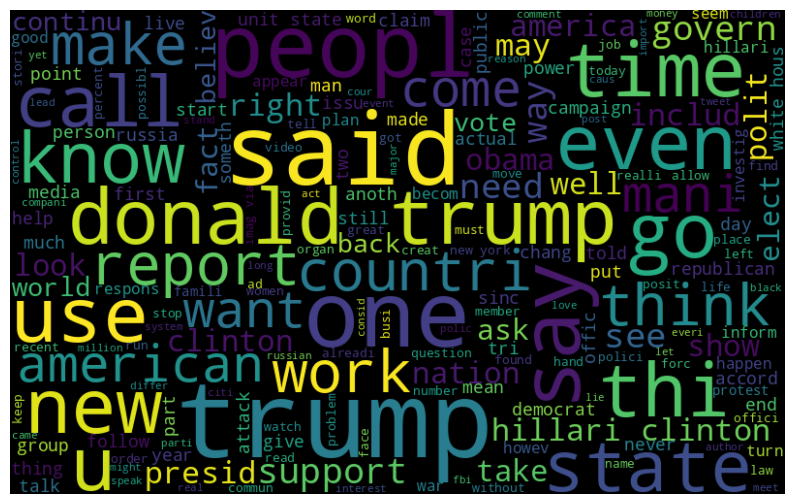

In [ ]:
#Wordcloud to represent the most used words from 'real' news
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

real_news_identifier = ' '.join(list(data[data['word_label'] == 'real']['text']))

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_news_identifier)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()